# Team Xfinity 2.0 - IMDB dataframe and regression models

Dataset : https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

The implementation is divided into two sections
1. first one is analysis using visualization. This analysis gives each director's performance based upon profit made by his/her movie and each movie's genre popularity
2. second one is comparision of Linear and Logistics regression model and deduce the most efficient algorithm

In [122]:
#import necessary files
import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sbn
import pylab as pl
from collections import Counter
from sklearn.metrics import confusion_matrix
%matplotlib inline

#change the display format from 1+e to float
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('C:/Users/Arun Prasad/Desktop/Watto/movie_metadata.csv')

In [123]:
#display the dataframe
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,NaN,Doug Walker,nan,nan,131.000,nan,Rob Walker,131.000,nan,Documentary,...,nan,NaN,NaN,NaN,nan,nan,12.000,7.100,nan,0
5,Color,Andrew Stanton,462.000,132.000,475.000,530.000,Samantha Morton,640.000,73058679.000,Action|Adventure|Sci-Fi,...,738.000,English,USA,PG-13,263700000.000,2012.000,632.000,6.600,2.350,24000
6,Color,Sam Raimi,392.000,156.000,0.000,4000.000,James Franco,24000.000,336530303.000,Action|Adventure|Romance,...,1902.000,English,USA,PG-13,258000000.000,2007.000,11000.000,6.200,2.350,0
7,Color,Nathan Greno,324.000,100.000,15.000,284.000,Donna Murphy,799.000,200807262.000,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.000,English,USA,PG,260000000.000,2010.000,553.000,7.800,1.850,29000
8,Color,Joss Whedon,635.000,141.000,0.000,19000.000,Robert Downey Jr.,26000.000,458991599.000,Action|Adventure|Sci-Fi,...,1117.000,English,USA,PG-13,250000000.000,2015.000,21000.000,7.500,2.350,118000
9,Color,David Yates,375.000,153.000,282.000,10000.000,Daniel Radcliffe,25000.000,301956980.000,Adventure|Family|Fantasy|Mystery,...,973.000,English,UK,PG,250000000.000,2009.000,11000.000,7.500,2.350,10000


In [124]:
# Cleaning the dataset by replacing the NAN with the mean of the values(applicable for non-string datafields)
df = df.fillna(df.mean())

#display dataframe for confirmation
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,NaN,Doug Walker,140.194,107.201,131.000,645.010,Rob Walker,131.000,48468407.527,Documentary,...,272.771,NaN,NaN,NaN,39752620.436,2002.471,12.000,7.100,2.220,0
5,Color,Andrew Stanton,462.000,132.000,475.000,530.000,Samantha Morton,640.000,73058679.000,Action|Adventure|Sci-Fi,...,738.000,English,USA,PG-13,263700000.000,2012.000,632.000,6.600,2.350,24000
6,Color,Sam Raimi,392.000,156.000,0.000,4000.000,James Franco,24000.000,336530303.000,Action|Adventure|Romance,...,1902.000,English,USA,PG-13,258000000.000,2007.000,11000.000,6.200,2.350,0
7,Color,Nathan Greno,324.000,100.000,15.000,284.000,Donna Murphy,799.000,200807262.000,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.000,English,USA,PG,260000000.000,2010.000,553.000,7.800,1.850,29000
8,Color,Joss Whedon,635.000,141.000,0.000,19000.000,Robert Downey Jr.,26000.000,458991599.000,Action|Adventure|Sci-Fi,...,1117.000,English,USA,PG-13,250000000.000,2015.000,21000.000,7.500,2.350,118000
9,Color,David Yates,375.000,153.000,282.000,10000.000,Daniel Radcliffe,25000.000,301956980.000,Adventure|Family|Fantasy|Mystery,...,973.000,English,UK,PG,250000000.000,2009.000,11000.000,7.500,2.350,10000


In [84]:
data = pd.read_csv('C:/Users/Arun Prasad/Desktop/Watto/movie_metadata.csv')
data_clean = data.dropna()
#Show first five records in dataframe
data_clean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
5,Color,Andrew Stanton,462.000,132.000,475.000,530.000,Samantha Morton,640.000,73058679.000,Action|Adventure|Sci-Fi,...,738.000,English,USA,PG-13,263700000.000,2012.000,632.000,6.600,2.350,24000


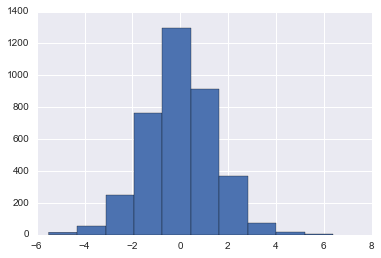

In [125]:
#plot simple histogram for movies and imdb_score
plt.figure();
data_clean['imdb_score'].diff().hist()
plt.show()

C:\Users\Arun Prasad\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


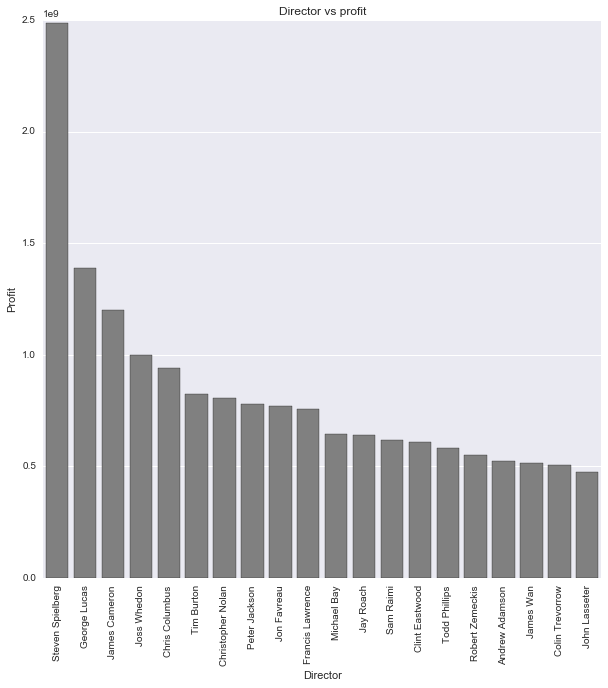

In [126]:
#Analyse the performance of individual directors
#Success of director's movie can be analysed by seeing the profit earned. 

#create new column profit in dataframe which is difference between revenue and budget
data_clean['profit'] = data['gross'] - data['budget']


dir_profit = data_clean.groupby(data['director_name'])['profit'].sum()

dir_profit_index = dir_profit.sort_values(ascending=False)[:20].index
dir_profit_values = dir_profit.sort_values(ascending=False)[:20].values

fig,ax = plt.subplots(figsize=(10,10))
sbn.barplot(x = dir_profit_index,
            y = dir_profit_values,
            color='grey',
            ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

plt.title('Director vs profit')
plt.ylabel('Profit')
plt.xlabel('Director')
del fig,ax,ticks


In [87]:
#Find out the popularity of genres. First check how many movies are produced for each genre
#process genres 

genre_column_values = data_clean['genres'].map(lambda x:x.split('|'))
genre_column_values.head()
#get the list of unique genres in movie dataset


0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [127]:
#create list of unique genres to plot along X-axis

unique_genre= []
for genre in genre_column_values:
    for val in genre:
        if val not in unique_genre:
            unique_genre.append(val)
            
unique_genre

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Romance',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'Film-Noir']

In [128]:
#now plot genres vs total number of movies in each genrea

#first we have to calculate number of movies associated with each genre. 
#we can do so using for loop below and store genre and count as key value pair in dictionary
genre_count ={}
for value in unique_genre:
    count=0
    for record in genre_column_values:
        if value in record:
            count+=1
    genre_count[value]= count

genre_count

{'Action': 959,
 'Adventure': 781,
 'Animation': 196,
 'Biography': 239,
 'Comedy': 1461,
 'Crime': 709,
 'Documentary': 45,
 'Drama': 1893,
 'Family': 442,
 'Fantasy': 507,
 'Film-Noir': 1,
 'History': 149,
 'Horror': 392,
 'Music': 151,
 'Musical': 96,
 'Mystery': 384,
 'Romance': 859,
 'Sci-Fi': 496,
 'Sport': 148,
 'Thriller': 1117,
 'War': 152,
 'Western': 59}

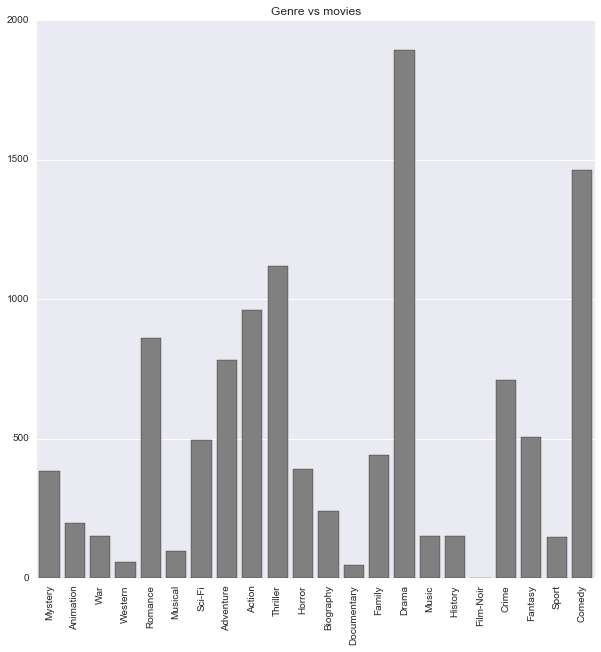

In [90]:
#lets plot this on graph

genre_counter =Counter(genre_count)
genre_indx = np.asarray(list(genre_counter.keys()))
genre_val = np.asarray(list(genre_counter.values()))
fig,ax = plt.subplots(figsize=(10,10))
sbn.barplot(x = genre_indx, y = genre_val,color='grey',ax=ax)
plt.title('Genre vs movies')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
del fig,ax,ticks

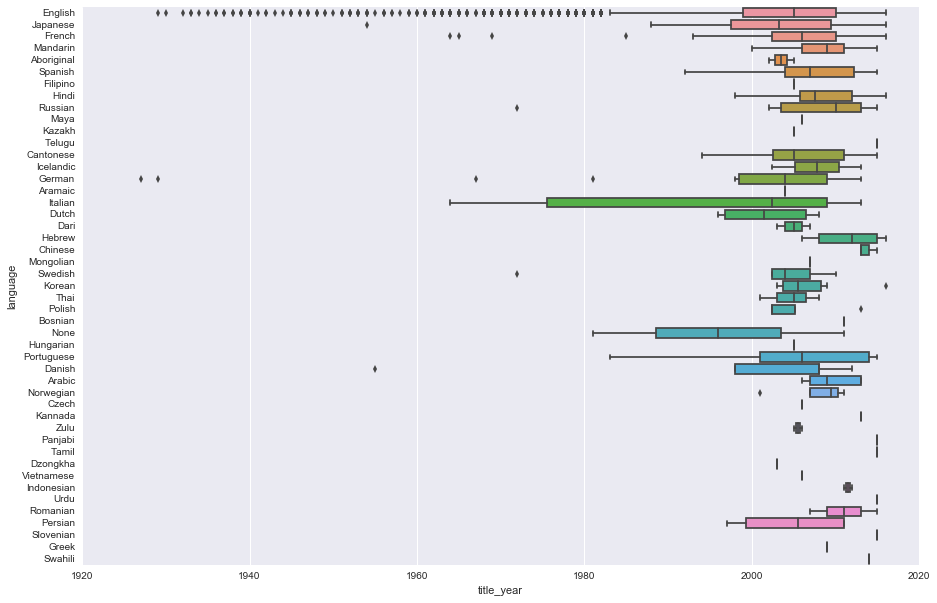

In [118]:
plt.figure(figsize=(15,10))
ax = sbn.boxplot(x="title_year", y="language", data=df)

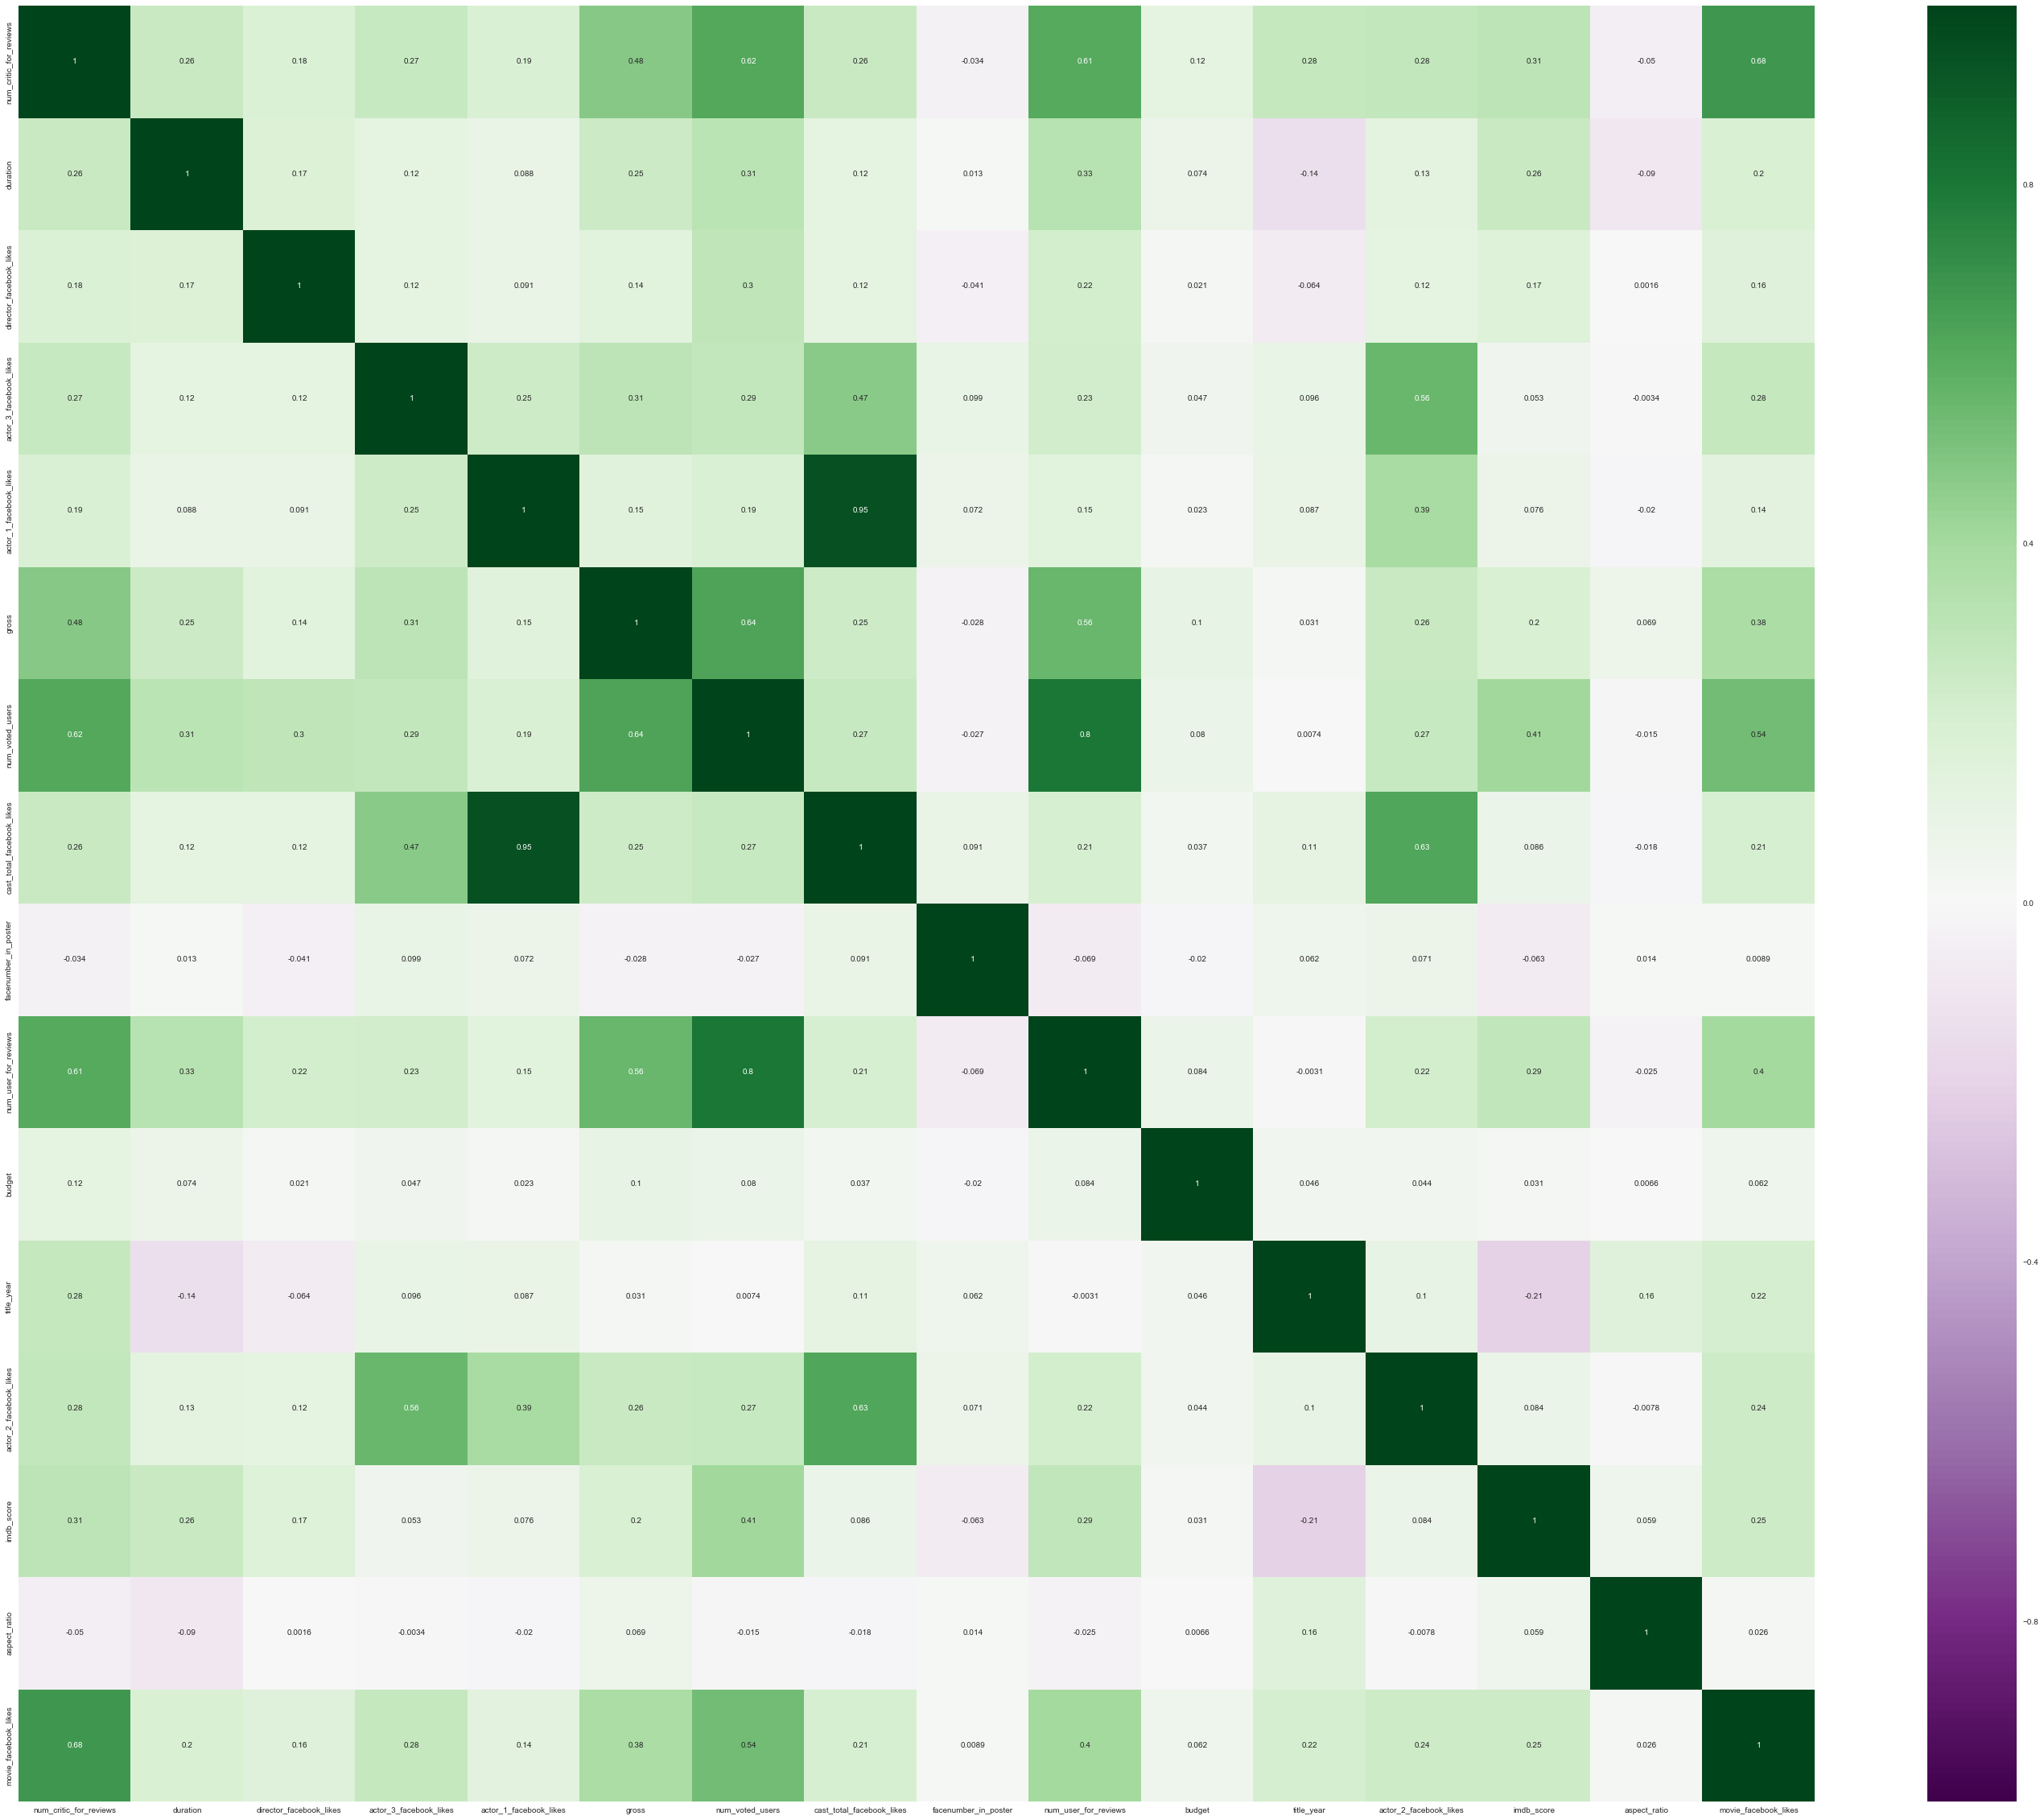

In [91]:
# Create the Correlation Matrix
corr_val = df.corr()
plt.figure(figsize=(50,40))
sbn.heatmap(corr_val,vmax=None,square=False,annot=True,cmap='PRGn')

In [99]:
# Cleaning the dataset by replacing the NAN with the mean of the values(applicable for non-string datafields)
df = df.fillna(df.mean())

#display dataframe for confirmation
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,NaN,Doug Walker,140.194,107.201,131.000,645.010,Rob Walker,131.000,48468407.527,Documentary,...,272.771,NaN,NaN,NaN,39752620.436,2002.471,12.000,7.100,2.220,0
5,Color,Andrew Stanton,462.000,132.000,475.000,530.000,Samantha Morton,640.000,73058679.000,Action|Adventure|Sci-Fi,...,738.000,English,USA,PG-13,263700000.000,2012.000,632.000,6.600,2.350,24000
6,Color,Sam Raimi,392.000,156.000,0.000,4000.000,James Franco,24000.000,336530303.000,Action|Adventure|Romance,...,1902.000,English,USA,PG-13,258000000.000,2007.000,11000.000,6.200,2.350,0
7,Color,Nathan Greno,324.000,100.000,15.000,284.000,Donna Murphy,799.000,200807262.000,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.000,English,USA,PG,260000000.000,2010.000,553.000,7.800,1.850,29000
8,Color,Joss Whedon,635.000,141.000,0.000,19000.000,Robert Downey Jr.,26000.000,458991599.000,Action|Adventure|Sci-Fi,...,1117.000,English,USA,PG-13,250000000.000,2015.000,21000.000,7.500,2.350,118000
9,Color,David Yates,375.000,153.000,282.000,10000.000,Daniel Radcliffe,25000.000,301956980.000,Adventure|Family|Fantasy|Mystery,...,973.000,English,UK,PG,250000000.000,2009.000,11000.000,7.500,2.350,10000


In [119]:
# Create new training and test dataframes
df_new = df[['gross','budget','imdb_score']]
df_new

trainData = df_new[:4000] # 1-4000 rows in dataframe as trainData
testData = df_new[4000:] # 4000-5034 in dataframe as trainData

#Training datasets
df_y_train = trainData[['imdb_score']]
df_x_train = trainData.drop('imdb_score',1)

#test datasets
df_y_test = testData[['imdb_score']]
df_x_test = testData.drop('imdb_score',1)

In [120]:
#print io see if datasets are properly created
df_y_test

,imdb_score
4000,8.200
4001,7.200
4002,4.800
4003,7.800
4004,5.200
4005,3.300
4006,6.800
4007,7.000
4008,6.500
4009,5.700


Coefficients: 
 [[  3.48660016e-09   7.20959510e-11]]
Mean squared error: 1.64


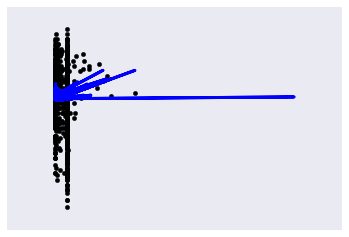

In [129]:
# Linear Regression model:

# Create the linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training sets
m=regr.fit(df_x_train,df_y_train)

# The coefficients of the equation are
print('Coefficients: \n', m.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((m.predict(df_x_test) - df_y_test) ** 2))

plt.scatter(df_x_test['gross'], df_y_test,  color='black')
plt.plot(df_x_test, regr.predict(df_x_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [103]:
#verifying the accuracy of the linear regression model
model = sm.OLS(df_y_train,df_x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1483.
Date:                Mon, 27 Feb 2017   Prob (F-statistic):               0.00
Time:                        17:17:44   Log-Likelihood:                -12074.
No. Observations:                4000   AIC:                         2.415e+04
Df Residuals:                    3998   BIC:                         2.416e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gross       4.774e-08   9.28e-10     51.463      0.000      4.59e-08  4.96e-08
budget      2.547e-09   3.58e-10      7.123      0.000      1.85e-09  3.25e-09
==============================================================================
Omnibus:                     2521.868   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36677.630
Skew:                          -2.787   Prob(JB):                         0.00
Kurtosis:                      16.748   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

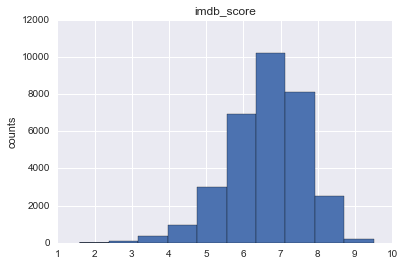

In [104]:
# Plot histogram plot for imdb_score
df.hist('imdb_score',weights =df['imdb_score'])
plt.ylabel('counts')
plt.show()

In [130]:
# Logistic Regression

# As this form of regression needs only categorical values we need to add "GoodOrBad" column: 1 represents good, 0 represents bad
df['GoodOrBad']= (df.imdb_score > 5.5).astype(int)
df['GoodOrBad']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
5013    1
5014    1
5015    1
5016    0
5017    0
5018    1
5019    0
5020    0
5021    1
5022    1
5023    1
5024    0
5025    1
5026    1
5027    1
5028    1
5029    1
5030    1
5031    0
5032    1
5033    1
5034    1
5035    1
5036    1
5037    1
5038    1
5039    1
5040    1
5041    1
5042    1
Name: GoodOrBad, dtype: int32

In [106]:
# Split the data into training/testing sets
df_new2 = df[['gross','budget','GoodOrBad']]
df_new2

#create train and test data frames
trainData_log = df_new2[:4000]
testData_log = df_new2[4001:]

trainData_log

,gross,budget,GoodOrBad
0,760505847.000,237000000.000,1
1,309404152.000,300000000.000,1
2,200074175.000,245000000.000,1
3,448130642.000,250000000.000,1
4,48468407.527,39752620.436,1
5,73058679.000,263700000.000,1
6,336530303.000,258000000.000,1
7,200807262.000,260000000.000,1
8,458991599.000,250000000.000,1
9,301956980.000,250000000.000,1


In [107]:
#create train and test data for performing regression analysis
df_y_log_train = trainData_log[['GoodOrBad']]
df_x_log_train = trainData_log.drop('GoodOrBad',1)
df_y_log_test = testData_log[['GoodOrBad']]
df_x_log_test = testData_log.drop('GoodOrBad',1)

In [108]:
# implement the regression algorithm
log_model = linear_model.LogisticRegression()
log_model.fit(X= df_x_log_train, 
              y = df_y_log_train)

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[  6.51843403e-16]
[[  1.13670121e-08   9.26279575e-10]]


C:\Users\Arun Prasad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[  0 326]
 [  0 716]]


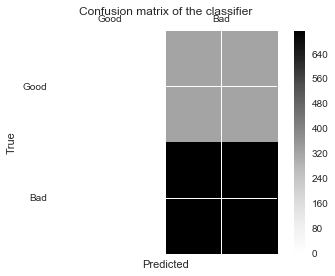

In [115]:
#create confusion matrix
cm = confusion_matrix(df_y_log_test,log_model.predict(df_x_log_test))
print(cm)
labels=['Good','Bad']

# plot the confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pl.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

In [131]:
# Calculate the accuracy of this regression model
accuracy_score(df_y_log_test,log_model.predict(df_x_log_test))

0.68714011516314777